In [ ]:
#Imports
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import RobustScaler,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving BTC-USD.csv to BTC-USD (10).csv
Saving tweets_updated.csv to tweets_updated (10).csv


{'BTC-USD (10).csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004\n2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547\n2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362\n2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905\n2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859\n2022-01-06,43565.511719,43748.718750,42645.539063,43160.929688,43160.929688,30208048289\n2022-01-07,43153.570313,43153.570313,41077.445313,41557.902344,41557.902344,84196607520\n2022-01-08,41561.464844,42228.941406,40672.277344,41733.941406,41733.941406,28066355845\n2022-01-09,41734.726563,42663.949219,41338.160156,41911.601563,41911.601563,21294384372\n2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331\n2022-01-11,41819.507813,43001.156250,41407.7

In [ ]:
print("Tweets Data")
df = pd.read_csv('tweets_updated.csv')
df.head()



Tweets Data


token                     date  reply_count  like_count  retweet_count  \
0  bitcoin  2022-01-01 00:00:00.000           20         207             31   
1  bitcoin  2022-01-01 00:00:00.000          232        3405            286   
2  bitcoin  2022-01-01 00:00:00.000            2         861             12   
3  bitcoin  2022-01-01 00:00:00.000           18         306             30   
4  bitcoin  2022-01-01 00:00:00.000           35         721             35   

   quote_count sentiment_label  sentiment_score  
0            3         Neutral         0.717482  
1           27         Neutral         0.810814  
2            0         Neutral         0.606978  
3            9        Negative         0.510956  
4            1        Positive         0.988296

In [ ]:
print("Bitcoin Data")
df2 = pd.read_csv('BTC-USD.csv')
df2.head()

Bitcoin Data


Date          Open          High           Low         Close  \
0  2022-01-01  46311.746094  47827.312500  46288.484375  47686.812500   
1  2022-01-02  47680.925781  47881.406250  46856.937500  47345.218750   
2  2022-01-03  47343.542969  47510.726563  45835.964844  46458.117188   
3  2022-01-04  46458.851563  47406.546875  45752.464844  45897.574219   
4  2022-01-05  45899.359375  46929.046875  42798.222656  43569.003906   

      Adj Close       Volume  
0  47686.812500  24582667004  
1  47345.218750  27951569547  
2  46458.117188  33071628362  
3  45897.574219  42494677905  
4  43569.003906  36851084859

In [ ]:

rows_with_one = df[df['date'] == "2022-01-01 00:00:00.000"]
print(rows_with_one)

neutral_count = (rows_with_one['sentiment_label'] == "Neutral").sum()
print("Neutral count: ",neutral_count)

positive_count = (rows_with_one['sentiment_label'] == "Positive").sum()
print("Positive count: ",positive_count)

negative_count = (rows_with_one['sentiment_label'] == "Negative").sum()
print("Negative count: ",negative_count)




       token                     date  reply_count  like_count  retweet_count  \
0    bitcoin  2022-01-01 00:00:00.000           20         207             31   
1    bitcoin  2022-01-01 00:00:00.000          232        3405            286   
2    bitcoin  2022-01-01 00:00:00.000            2         861             12   
3    bitcoin  2022-01-01 00:00:00.000           18         306             30   
4    bitcoin  2022-01-01 00:00:00.000           35         721             35   
..       ...                      ...          ...         ...            ...   
109  bitcoin  2022-01-01 00:00:00.000           43        1796            110   
110  bitcoin  2022-01-01 00:00:00.000           45        2558            153   
111  bitcoin  2022-01-01 00:00:00.000          130        1182             69   
112  bitcoin  2022-01-01 00:00:00.000          329        2782            200   
113  bitcoin  2022-01-01 00:00:00.000           45        1294            231   

     quote_count sentiment_

In [ ]:
tweet_data = pd.read_csv('tweets_updated.csv')
bitcoin_data = pd.read_csv('BTC-USD.csv')


tweet_data['date'] = pd.to_datetime(tweet_data['date'])
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])


merged_data = pd.merge(tweet_data, bitcoin_data, how='inner', left_on='date', right_on='Date')
merged_data['tweet_number'] = range(1, len(merged_data) + 1)
selected_data = merged_data[['date', 'sentiment_label', 'sentiment_score', 'Close']]



#each day 3 labels average
detailed_avg = selected_data.groupby(['date', 'sentiment_label'])['sentiment_score'].mean()
print("Detailed average sentiment score per date and sentiment label:")
print(detailed_avg)
print(merged_data.head())





Detailed average sentiment score per date and sentiment label:
date        sentiment_label
2022-01-01  Negative           0.725203
            Neutral            0.758024
            Positive           0.891842
2022-01-02  Negative           0.741758
            Neutral            0.696674
                                 ...   
2023-06-21  Neutral            0.720111
            Positive           0.728282
2023-06-22  Negative           0.649422
            Neutral            0.712866
            Positive           0.748492
Name: sentiment_score, Length: 1614, dtype: float64
     token       date  reply_count  like_count  retweet_count  quote_count  \
0  bitcoin 2022-01-01           20         207             31            3   
1  bitcoin 2022-01-01          232        3405            286           27   
2  bitcoin 2022-01-01            2         861             12            0   
3  bitcoin 2022-01-01           18         306             30            9   
4  bitcoin 2022-01-01      

In [ ]:
tweet_data = pd.read_csv('tweets_updated.csv')
bitcoin_data = pd.read_csv('BTC-USD.csv')

tweet_data['date'] = pd.to_datetime(tweet_data['date'])
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

#Merge the data on the date column
merged_data = pd.merge(tweet_data, bitcoin_data, how='inner', left_on='date', right_on='Date')
merged_data['tweet_number'] = range(1, len(merged_data) + 1)
selected_data = merged_data[['date', 'sentiment_label', 'sentiment_score', 'Close']]

#average sentiment score per date and sentiment label
detailed_avg = selected_data.groupby(['date', 'sentiment_label'])['sentiment_score'].mean()

print("Detailed average sentiment score per date and sentiment label:")
print(detailed_avg.head())
print("\nMerged Data Sample:")
print(merged_data.head())

#Tweet counts for each sentiment label per day
tweet_counts = tweet_data.groupby(['date', 'sentiment_label']).size().reset_index(name='count')
merged_data_with_counts = pd.merge(selected_data, tweet_counts, how='left', on=['date', 'sentiment_label'])

#new column here
merged_data_with_counts['weighted_sentiment'] = merged_data_with_counts['sentiment_score'] * merged_data_with_counts['count']
#(weighted sentiment divided by count)
merged_data_with_counts['average_sentiment'] = merged_data_with_counts['weighted_sentiment'] / merged_data_with_counts['count']

summed_average_sentiments = merged_data_with_counts.groupby(['date', 'sentiment_label'])['average_sentiment'].sum().reset_index()
pivoted_average_sentiments = summed_average_sentiments.pivot(index='date', columns='sentiment_label', values='average_sentiment')
pivoted_average_sentiments.columns = [f'average_{col}' for col in pivoted_average_sentiments.columns]

print("pivoted average sentiment",pivoted_average_sentiments.head())



Detailed average sentiment score per date and sentiment label:
date        sentiment_label
2022-01-01  Negative           0.725203
            Neutral            0.758024
            Positive           0.891842
2022-01-02  Negative           0.741758
            Neutral            0.696674
Name: sentiment_score, dtype: float64

Merged Data Sample:
     token       date  reply_count  like_count  retweet_count  quote_count  \
0  bitcoin 2022-01-01           20         207             31            3   
1  bitcoin 2022-01-01          232        3405            286           27   
2  bitcoin 2022-01-01            2         861             12            0   
3  bitcoin 2022-01-01           18         306             30            9   
4  bitcoin 2022-01-01           35         721             35            1   

  sentiment_label  sentiment_score       Date          Open        High  \
0         Neutral         0.717482 2022-01-01  46311.746094  47827.3125   
1         Neutral         0.810

In [ ]:
btc_prices = merged_data.groupby('date')['Close'].mean()
btc_prices = btc_prices.reset_index()
average_final_data = pd.merge(pivoted_average_sentiments, btc_prices, on='date')

print(average_final_data.head())


        date  average_Negative  average_Neutral  average_Positive  \
0 2022-01-01         10.878047        34.111083         48.159454   
1 2022-01-02          4.450547        29.260320         19.189911   
2 2022-01-03          7.376840        24.232059         26.019721   
3 2022-01-04          6.522436        18.632880         19.846737   
4 2022-01-05          8.479094        28.223147         18.803869   

          Close  
0  47686.812500  
1  47345.218750  
2  46458.117188  
3  45897.574219  
4  43569.003906  


In [ ]:
"""detailed_avg = merged_data.groupby(['date', 'sentiment_label'])['sentiment_score'].mean().unstack()
detailed_avg = detailed_avg.reset_index()

btc_prices = merged_data.groupby('date')['Close'].mean()
btc_prices = btc_prices.reset_index()
avg_data = pd.merge(detailed_avg, btc_prices, on='date')

print(avg_data.head())"""


        date  Negative   Neutral  Positive         Close
0 2022-01-01  0.725203  0.758024  0.891842  47686.812500
1 2022-01-02  0.741758  0.696674  0.767596  47345.218750
2 2022-01-03  0.614737  0.692345  0.897232  46458.117188
3 2022-01-04  0.724715  0.690107  0.793869  45897.574219
4 2022-01-05  0.652238  0.705579  0.723226  43569.003906


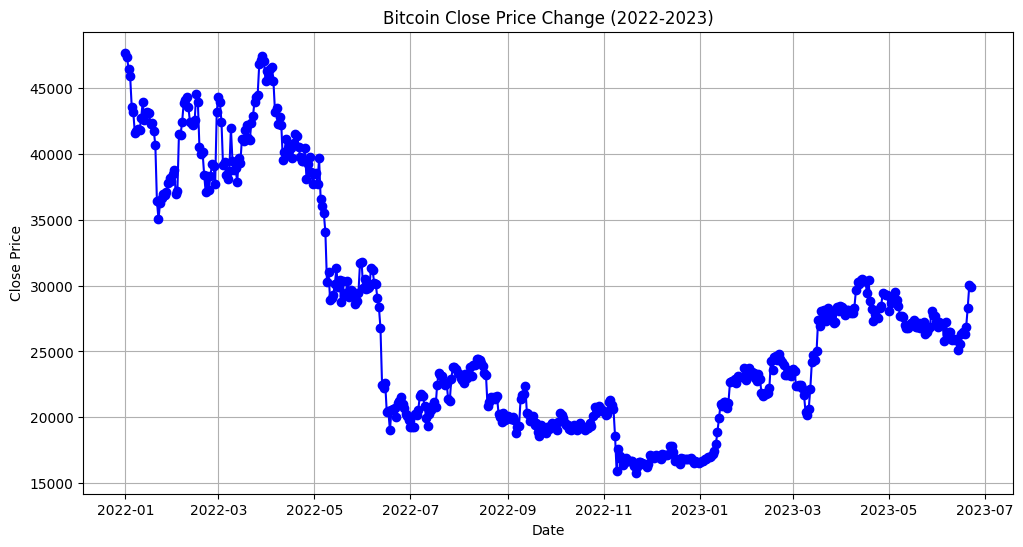

In [ ]:

avg_data['date'] = pd.to_datetime(avg_data['date'])
plt.figure(figsize=(12, 6))
plt.plot(avg_data['date'], avg_data['Close'], marker='o', linestyle='-', color='b')
plt.title('Bitcoin Close Price Change (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

            average_Negative  average_Neutral  average_Positive         Close
date                                                                         
2022-01-01         10.878047        34.111083         48.159454  47686.812500
2022-01-02          4.450547        29.260320         19.189911  47345.218750
2022-01-03          7.376840        24.232059         26.019721  46458.117188
2022-01-04          6.522436        18.632880         19.846737  45897.574219
2022-01-05          8.479094        28.223147         18.803869  43569.003906
Epoch 1/15
294/294 [==============================] - 3s 3ms/step - loss: 0.1472
Epoch 2/15
294/294 [==============================] - 1s 3ms/step - loss: 0.0752
Epoch 3/15
294/294 [==============================] - 1s 3ms/step - loss: 0.0583
Epoch 4/15
294/294 [==============================] - 1s 3ms/step - loss: 0.0560
Epoch 5/15
294/294 [==============================] - 1s 3ms/step - loss: 0.0577
Epoch 6/15
294/294 [=============================

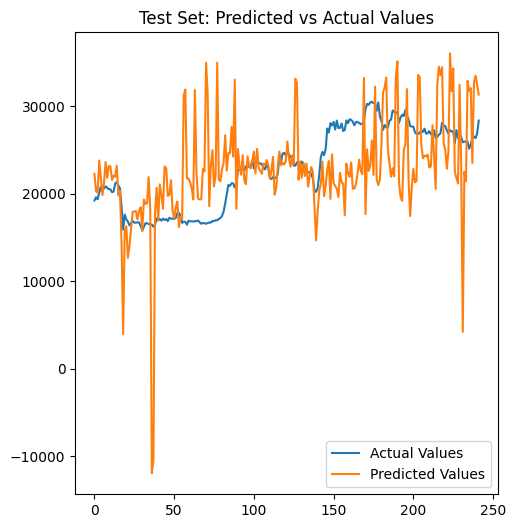

Mae(avg):  4269.840307481672
Mape(avg):  19.27044087366632
RMSE(avg):  5905.875485332391
R2 score (avg):  -0.6885018690637277


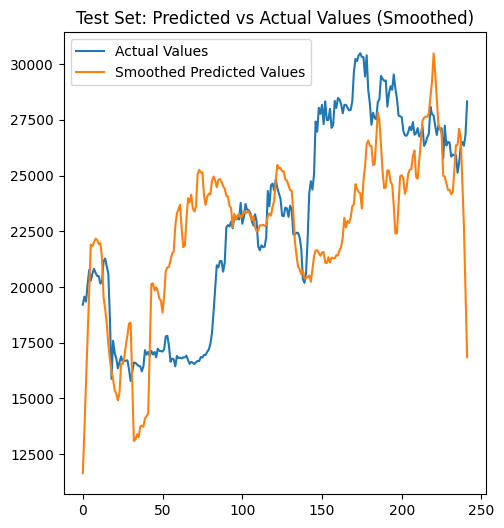

Smoothed Mae(avg):  3019.812923489723
Smoothed Mape(avg):  13.880201506455805
Smoothed RMSE(avg):  3855.707916197681
Smoothed R2 score(avg):  0.2803170282302726


In [ ]:
#Weighted Average Multivariate LSTM Model(Model 1)

average_final_data = pd.merge(pivoted_average_sentiments, btc_prices, on='date')
average_final_data['date'] = pd.to_datetime(average_final_data['date'])
average_final_data.set_index('date', inplace=True)
print(average_final_data.head())


#scaling
scaler = MinMaxScaler()
avg_scaled_data = scaler.fit_transform(average_final_data)

#converting to data to time series format
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :-1] #iloc oldugunda .values  # Tüm özellikler hariç sonuncusu
        dataX.append(a)
        dataY.append(dataset[i + time_step - 1, -1]) # Son özellik (Close price)
    return np.array(dataX), np.array(dataY)

time_step = 1
X, y = create_dataset(avg_scaled_data, time_step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, shuffle = False)


model_avg = Sequential()
model_avg.add(LSTM(units=50, input_shape=(time_step, X.shape[2])))
model_avg.add(Dropout(0.2))
model_avg.add(Dense(units=1))
model_avg.compile(optimizer='adam', loss='mean_squared_error')
model_avg.fit(X_train, y_train, batch_size=1, epochs=15)

#predicting and inverse transform
predictions = model_avg.predict(X_test)
predicted_shape = avg_scaled_data.shape[1]
predictions_padded = np.zeros((predictions.shape[0], predicted_shape))
predictions_padded[:, -1] = predictions.ravel()
y_pred_inversed = scaler.inverse_transform(predictions_padded)[:, -1]
y_test_padded = np.zeros((y_test.shape[0], avg_scaled_data.shape[1]))
y_test_padded[:, -1] = y_test
y_test_inversed = scaler.inverse_transform(y_test_padded)[:, -1]


#plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(y_test_inversed, label="Actual Values")
plt.plot(y_pred_inversed, label="Predicted Values")
plt.title('Test Set: Predicted vs Actual Values')
plt.legend()
plt.show()

#Evaluation Metrics of Average model
mae_avg = np.mean(np.abs(np.array(y_test_inversed) - np.array(y_pred_inversed)))
mape_avg = np.mean(np.abs((np.array(y_test_inversed) - np.array(y_pred_inversed)) / np.array(y_test_inversed))) * 100
rmse_avg = np.sqrt(np.mean((np.array(y_test_inversed) - np.array(y_pred_inversed))**2))
r2_avg = r2_score(y_test_inversed,y_pred_inversed)
print("Mae(avg): ",mae_avg)
print("Mape(avg): ",mape_avg)
print("RMSE(avg): ", rmse_avg)
print("R2 score (avg): ", r2_avg)

#Simply moving average
def smooth_data(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

window_size = 11
smoothed_predictions = smooth_data(y_pred_inversed, window_size)
smoothed_actual_values = smooth_data(y_test_inversed, window_size)

#smoothed plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(y_test_inversed, label="Actual Values")
plt.plot(smoothed_predictions, label="Smoothed Predicted Values")
plt.title('Test Set: Predicted vs Actual Values (Smoothed)')
plt.legend()
plt.show()

#Evaluation Metrics of Smoothed Average model
smoothed_mae_avg = np.mean(np.abs(np.array(y_test_inversed) - np.array(smoothed_predictions)))
smoothed_mape_avg = np.mean(np.abs((np.array(y_test_inversed) - np.array(smoothed_predictions)) / np.array(y_test_inversed))) * 100
smoothed_rmse_avg = np.sqrt(np.mean((np.array(y_test_inversed) - np.array(smoothed_predictions))**2))
smoothed_r2_avg = r2_score(y_test_inversed,smoothed_predictions)
print("Smoothed Mae(avg): ",smoothed_mae_avg)
print("Smoothed Mape(avg): ",smoothed_mape_avg)
print("Smoothed RMSE(avg): ", smoothed_rmse_avg)
print("Smoothed R2 score(avg): ", smoothed_r2_avg)




In [ ]:
import pandas as pd
merged_data = pd.merge(bitcoin_data, tweet_data, left_on='Date', right_on='date', how='left')

grouped_data = merged_data.groupby(['date', 'sentiment_label']).agg(
    Close_Price=('Close', 'first')
    Min_Sentiment_Score=('sentiment_score', 'min'),
    Sentiment_Count=('sentiment_score', 'count')
).reset_index()

# Multiply minimum score with count
grouped_data['Score_x_Count'] = grouped_data['Min_Sentiment_Score'] * grouped_data['Sentiment_Count']

# Display the first few rows of the resultant dataset
print(grouped_data.head())

        date sentiment_label  Close_Price  Min_Sentiment_Score  \
0 2022-01-01        Negative  47686.81250             0.487835   
1 2022-01-01         Neutral  47686.81250             0.491252   
2 2022-01-01        Positive  47686.81250             0.542343   
3 2022-01-02        Negative  47345.21875             0.513744   
4 2022-01-02         Neutral  47345.21875             0.469119   

   Sentiment_Count  Score_x_Count  
0               15       7.317524  
1               45      22.106331  
2               54      29.286517  
3                6       3.082463  
4               42      19.702986  


In [ ]:
def min_score_times_count(group):
    return group['sentiment_score'].min() * group['sentiment_score'].count()

#Group by date and sentiment type, and apply the function
grouped_data_min = merged_data.groupby(['Date', 'sentiment_label']).apply(min_score_times_count).unstack()
#Join the grouped data with the Bitcoin close price
min_data = grouped_data_min.join(bitcoin_data.set_index('Date')['Close'])
min_data.columns = ['min_Negative', 'min_Neutral', 'min_Positive', 'Close']
min_data.reset_index(inplace=True)
print(min_data.head())

def max_score_times_count(group):
    return group['sentiment_score'].max() * group['sentiment_score'].count()

#Group by date and sentiment type, and apply the function for maximum score
grouped_data_max = merged_data.groupby(['Date', 'sentiment_label']).apply(max_score_times_count).unstack()
#Join the grouped data with the Bitcoin close price
max_data = grouped_data_max.join(bitcoin_data.set_index('Date')['Close'])
max_data.columns = ['max_Negative', 'max_Neutral', 'max_Positive', 'Close']
max_data.reset_index(inplace=True)
max_data.head()

        Date  min_Negative  min_Neutral  min_Positive         Close
0 2022-01-01      7.317524    22.106331     29.286517  47686.812500
1 2022-01-02      3.082463    19.702986     12.176827  47345.218750
2 2022-01-03      5.088194    18.105525     19.183263  46458.117188
3 2022-01-04      4.742466    13.542433     12.971383  45897.574219
4 2022-01-05      5.717385    19.700190     13.099940  43569.003906


Date  max_Negative  max_Neutral  max_Positive         Close
0 2022-01-01     13.919269    40.830434     53.401424  47686.812500
1 2022-01-02      5.428494    37.130353     24.639076  47345.218750
2 2022-01-03     10.131958    33.132106     28.695161  46458.117188
3 2022-01-04      8.307173    24.720862     24.671552  45897.574219
4 2022-01-05     11.544546    36.975682     25.259588  43569.003906

            min_Negative  min_Neutral  min_Positive         Close
Date                                                             
2022-01-01      7.317524    22.106331     29.286517  47686.812500
2022-01-02      3.082463    19.702986     12.176827  47345.218750
2022-01-03      5.088194    18.105525     19.183263  46458.117188
2022-01-04      4.742466    13.542433     12.971383  45897.574219
2022-01-05      5.717385    19.700190     13.099940  43569.003906
Epoch 1/15
294/294 [==============================] - 3s 3ms/step - loss: 0.1444
Epoch 2/15
294/294 [==============================] - 1s 2ms/step - loss: 0.0761
Epoch 3/15
294/294 [==============================] - 1s 2ms/step - loss: 0.0564
Epoch 4/15
294/294 [==============================] - 1s 2ms/step - loss: 0.0552
Epoch 5/15
294/294 [==============================] - 1s 3ms/step - loss: 0.0561
Epoch 6/15
294/294 [==============================] - 1s 2ms/step - loss: 0.0544
Epoch 7/15
294/294 [==============================] 

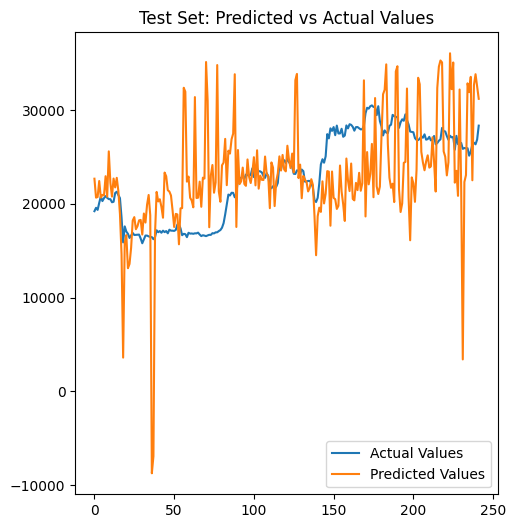

Mae(min):  4398.876316656891
Mape(min):  19.875008510765152
RMSE(min):  5942.723916185553
R2 score (min):  -0.7096376835251035


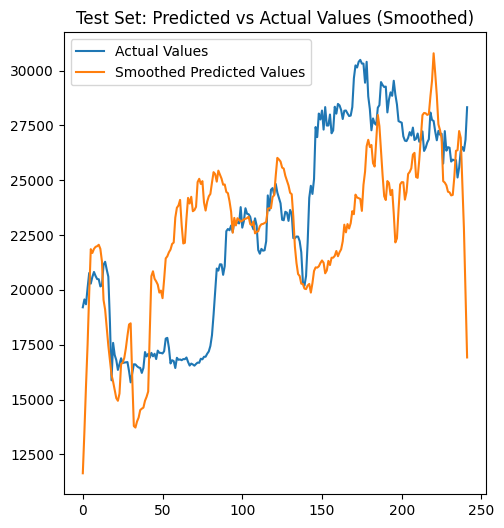

Smoothed Mae(min):  3101.958858480576
Smoothed Mape(min):  14.254477378287811
Smoothed RMSE(min):  3947.908883389511
Smoothed R2 score(min):  0.24548615322625966


In [ ]:
#Minimum Model (Model 2)
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import RobustScaler,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



min_final_data = pd.merge(min_data, btc_prices[['date', 'Close']], left_on='Date', right_on='date')
min_final_data.drop(['Close_y', 'date'], axis=1, inplace=True)
min_final_data.rename(columns={'Close_x': 'Close'}, inplace=True)
min_final_data.set_index('Date', inplace=True)
print(min_final_data.head())



scaler = MinMaxScaler()
min_scaled_data = scaler.fit_transform(min_final_data)

#converting to time series format
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :-1] #iloc oldugunda .values  # Tüm özellikler hariç sonuncusu
        dataX.append(a)
        dataY.append(dataset[i + time_step - 1, -1]) # Son özellik (Close price)
    return np.array(dataX), np.array(dataY)

time_step = 1


X_min , y_min = create_dataset(min_scaled_data, time_step)


X_train_min, X_test_min, y_train_min, y_test_min = train_test_split(X_min, y_min, test_size=0.45, shuffle = False)



model_min = Sequential()
model_min.add(LSTM(units=50, input_shape=(time_step, X_min.shape[2])))
model_min.add(Dropout(0.2))
model_min.add(Dense(units=1))
model_min.compile(optimizer='adam', loss='mean_squared_error')
model_min.fit(X_train_min, y_train_min, batch_size=1, epochs=15)

#predicting and inverse transform
predictions_min = model_min.predict(X_test_min)
predicted_shape_min = min_scaled_data.shape[1]
predictions_padded_min = np.zeros((predictions_min.shape[0], predicted_shape_min))
predictions_padded_min[:, -1] = predictions_min.ravel()
y_pred_inversed_min = scaler.inverse_transform(predictions_padded_min)[:, -1]
y_test_padded_min = np.zeros((y_test_min.shape[0], min_scaled_data.shape[1]))
y_test_padded_min[:, -1] = y_test_min
y_test_inversed_min = scaler.inverse_transform(y_test_padded_min)[:, -1]



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(y_test_inversed_min, label="Actual Values")
plt.plot(y_pred_inversed_min, label="Predicted Values")
plt.title('Test Set: Predicted vs Actual Values')
plt.legend()
plt.show()

#Evaluation Metrics of Minimum model
mae_min = np.mean(np.abs(np.array(y_test_inversed_min) - np.array(y_pred_inversed_min)))
mape_min = np.mean(np.abs((np.array(y_test_inversed_min) - np.array(y_pred_inversed_min)) / np.array(y_test_inversed_min))) * 100
rmse_min = np.sqrt(np.mean((np.array(y_test_inversed_min) - np.array(y_pred_inversed_min))**2))
r2_min = r2_score(y_test_inversed,y_pred_inversed_min)
print("Mae(min): ",mae_min)
print("Mape(min): ",mape_min)
print("RMSE(min): ", rmse_min)
print("R2 score (min): ", r2_min)



#Simply moving average
def smooth_data(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')
window_size = 11

smoothed_predictions_min = smooth_data(y_pred_inversed_min, window_size)
smoothed_actual_values_min = smooth_data(y_test_inversed_min, window_size)

#smoothed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(y_test_inversed_min, label="Actual Values")
plt.plot(smoothed_predictions_min, label="Smoothed Predicted Values")
plt.title('Test Set: Predicted vs Actual Values (Smoothed)')
plt.legend()
plt.show()

#Evaluation Metrics of Smoothed Minimum model
smoothed_mae_min = np.mean(np.abs(np.array(y_test_inversed_min) - np.array(smoothed_predictions_min)))
smoothed_mape_min = np.mean(np.abs((np.array(y_test_inversed_min) - np.array(smoothed_predictions_min)) / np.array(y_test_inversed_min))) * 100
smoothed_rmse_min = np.sqrt(np.mean((np.array(y_test_inversed_min) - np.array(smoothed_predictions_min))**2))
smoothed_r2_min = r2_score(y_test_inversed_min,smoothed_predictions_min)
print("Smoothed Mae(min): ",smoothed_mae_min)
print("Smoothed Mape(min): ",smoothed_mape_min)
print("Smoothed RMSE(min): ", smoothed_rmse_min)
print("Smoothed R2 score(min): ", smoothed_r2_min)





            max_Negative  max_Neutral  max_Positive         Close
Date                                                             
2022-01-01     13.919269    40.830434     53.401424  47686.812500
2022-01-02      5.428494    37.130353     24.639076  47345.218750
2022-01-03     10.131958    33.132106     28.695161  46458.117188
2022-01-04      8.307173    24.720862     24.671552  45897.574219
2022-01-05     11.544546    36.975682     25.259588  43569.003906
Epoch 1/15
294/294 [==============================] - 3s 3ms/step - loss: 0.1545
Epoch 2/15
294/294 [==============================] - 1s 3ms/step - loss: 0.0715
Epoch 3/15
294/294 [==============================] - 1s 2ms/step - loss: 0.0555
Epoch 4/15
294/294 [==============================] - 1s 2ms/step - loss: 0.0569
Epoch 5/15
294/294 [==============================] - 1s 2ms/step - loss: 0.0542
Epoch 6/15
294/294 [==============================] - 1s 3ms/step - loss: 0.0535
Epoch 7/15
294/294 [==============================] 

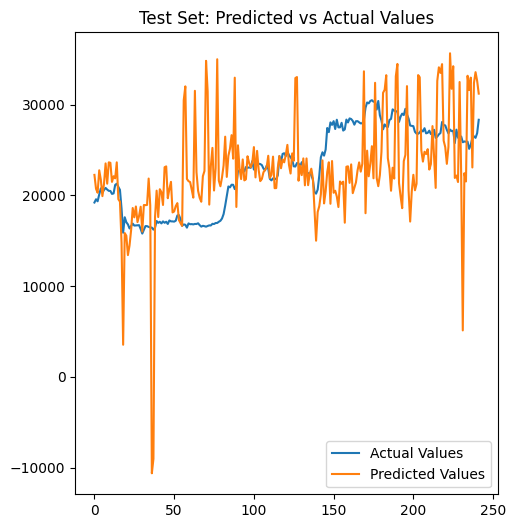

Mae(max):  4329.048884262689
Mape(max):  19.502518530135905
RMSE(max):  5891.027719272989
R2 score (max):  -0.6800225279831267


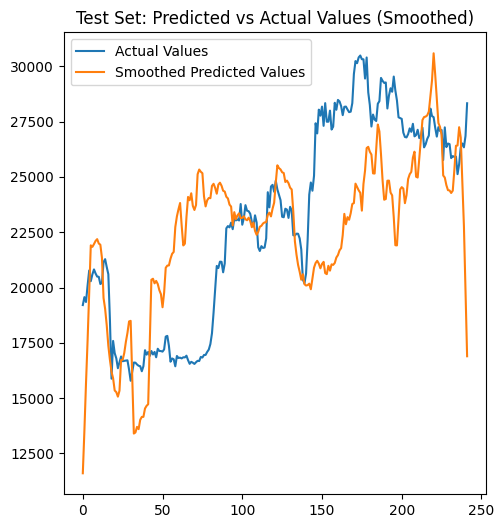

Smoothed Mae(max):  3098.625448273772
Smoothed Mape(max):  14.176335264954968
Smoothed RMSE(max):  3932.356225533035
Smoothed R2 score(max):  0.2514192088402092


In [ ]:
#Maximum Model (Model 3)

max_final_data = pd.merge(max_data, btc_prices[['date', 'Close']], left_on='Date', right_on='date')
max_final_data.drop(['Close_y', 'date'], axis=1, inplace=True)
max_final_data.rename(columns={'Close_x': 'Close'}, inplace=True)
max_final_data.set_index('Date', inplace=True)
print(max_final_data.head())

# Scaling the data
scaler = MinMaxScaler()
max_scaled_data = scaler.fit_transform(max_final_data)

# Converting data to time series format
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), :-1]
        dataX.append(a)
        dataY.append(dataset[i + time_step - 1, -1]) # Last feature (Close price)
    return np.array(dataX), np.array(dataY)

time_step = 1
X_max, y_max = create_dataset(max_scaled_data, time_step)

# Splitting data into training and test sets
X_train_max, X_test_max, y_train_max, y_test_max = train_test_split(X_max, y_max, test_size=0.45, shuffle = False)

# Building the LSTM model
model_max = Sequential()
model_max.add(LSTM(units=50, input_shape=(time_step, X_max.shape[2])))
model_max.add(Dropout(0.2))
model_max.add(Dense(units=1))
model_max.compile(optimizer='adam', loss='mean_squared_error')
model_max.fit(X_train_max, y_train_max, batch_size=1, epochs=15)

# Predicting and inverse transform
predictions_max = model_max.predict(X_test_max)
predicted_shape_max = max_scaled_data.shape[1]
predictions_padded_max = np.zeros((predictions_max.shape[0], predicted_shape_max))
predictions_padded_max[:, -1] = predictions_max.ravel()
y_pred_inversed_max = scaler.inverse_transform(predictions_padded_max)[:, -1]
y_test_padded_max = np.zeros((y_test_max.shape[0], max_scaled_data.shape[1]))
y_test_padded_max[:, -1] = y_test_max
y_test_inversed_max = scaler.inverse_transform(y_test_padded_max)[:, -1]

# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(y_test_inversed_max, label="Actual Values")
plt.plot(y_pred_inversed_max, label="Predicted Values")
plt.title('Test Set: Predicted vs Actual Values')
plt.legend()
plt.show()

# Evaluation Metrics for Maximum model
mae_max = np.mean(np.abs(np.array(y_test_inversed_max) - np.array(y_pred_inversed_max)))
mape_max = np.mean(np.abs((np.array(y_test_inversed_max) - np.array(y_pred_inversed_max)) / np.array(y_test_inversed_max))) * 100
rmse_max = np.sqrt(np.mean((np.array(y_test_inversed_max) - np.array(y_pred_inversed_max))**2))
r2_max = r2_score(y_test_inversed_max, y_pred_inversed_max)
print("Mae(max): ", mae_max)
print("Mape(max): ", mape_max)
print("RMSE(max): ", rmse_max)
print("R2 score (max): ", r2_max)

# Simply moving average
def smooth_data(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')
window_size = 11

smoothed_predictions_max = smooth_data(y_pred_inversed_max, window_size)
smoothed_actual_values_max = smooth_data(y_test_inversed_max, window_size)

# Smoothed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(y_test_inversed_max, label="Actual Values")
plt.plot(smoothed_predictions_max, label="Smoothed Predicted Values")
plt.title('Test Set: Predicted vs Actual Values (Smoothed)')
plt.legend()
plt.show()

# Evaluation Metrics for Smoothed Maximum model
smoothed_mae_max = np.mean(np.abs(np.array(y_test_inversed_max) - np.array(smoothed_predictions_max)))
smoothed_mape_max = np.mean(np.abs((np.array(y_test_inversed_max) - np.array(smoothed_predictions_max)) / np.array(y_test_inversed_max))) * 100
smoothed_rmse_max = np.sqrt(np.mean((np.array(y_test_inversed_max) - np.array(smoothed_predictions_max))**2))
smoothed_r2_max = r2_score(y_test_inversed_max, smoothed_predictions_max)
print("Smoothed Mae(max): ", smoothed_mae_max)
print("Smoothed Mape(max): ", smoothed_mape_max)
print("Smoothed RMSE(max): ", smoothed_rmse_max)
print("Smoothed R2 score(max): ", smoothed_r2_max)


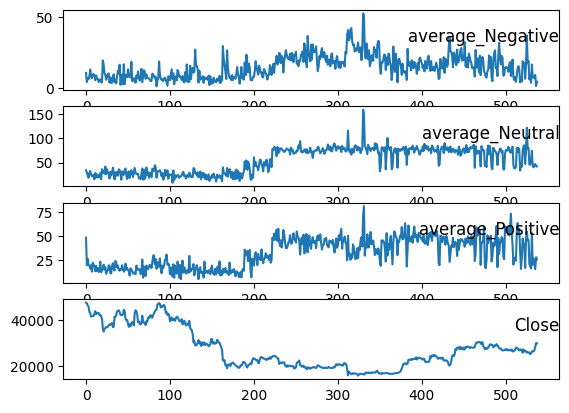

Index(['min_Negative', 'min_Neutral', 'min_Positive', 'Close'], dtype='object')
            min_Negative  min_Neutral  min_Positive         Close
Date                                                             
2022-01-01      7.317524    22.106331     29.286517  47686.812500
2022-01-02      3.082463    19.702986     12.176827  47345.218750
2022-01-03      5.088194    18.105525     19.183263  46458.117188
2022-01-04      4.742466    13.542433     12.971383  45897.574219
2022-01-05      5.717385    19.700190     13.099940  43569.003906


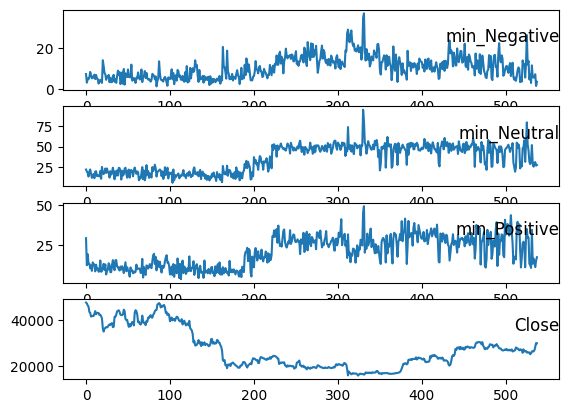

Index(['max_Negative', 'max_Neutral', 'max_Positive', 'Close'], dtype='object')
            max_Negative  max_Neutral  max_Positive         Close
Date                                                             
2022-01-01     13.919269    40.830434     53.401424  47686.812500
2022-01-02      5.428494    37.130353     24.639076  47345.218750
2022-01-03     10.131958    33.132106     28.695161  46458.117188
2022-01-04      8.307173    24.720862     24.671552  45897.574219
2022-01-05     11.544546    36.975682     25.259588  43569.003906


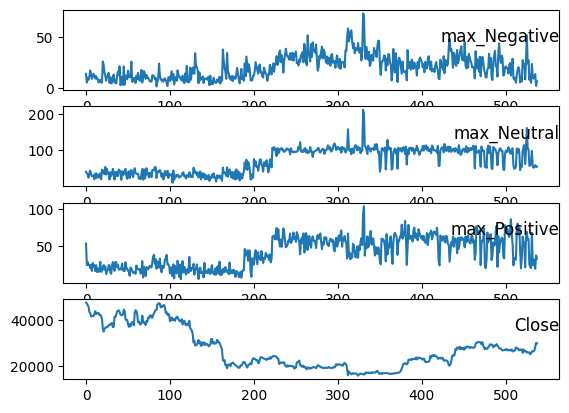

In [ ]:
from pandas import read_csv
from matplotlib import pyplot

values = average_final_data.values
#specify columns to plot
groups = [0, 1, 2, 3]
i = 1
#plot each column
pyplot.figure()
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(average_final_data.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()

print(min_final_data.columns)

values = min_final_data.values
print(min_final_data.head())

groups = [0, 1, 2, 3]
i = 1

pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(min_final_data.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()



print(max_final_data.columns)
values = max_final_data.values
print(max_final_data.head())

groups = [0, 1, 2, 3]
i = 1

pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(max_final_data.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()
